## Project 2 - Ames Housing Data and Kaggle Challenge - Attempt 17

### Importing Libraries

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics

In [2]:
# Adrian provided code to me that displays all the columns and rows
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)

### Load, Review,  and Clean Data

In [3]:
# Read in the Ames train data into a dataframe
ames_df = pd.read_csv('../datasets/train.csv')

In [4]:
# Check the first few rows of data
ames_df.head().T

,0,1,2,3,4
Id,109,544,153,318,255
PID,533352170,531379050,535304180,916386060,906425045
MS SubClass,60,60,20,60,50
MS Zoning,RL,RL,RL,RL,RL
Lot Frontage,NaN,43,68,73,82
Lot Area,13517,11492,7922,9802,14235
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
Lot Shape,IR1,IR1,Reg,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl


In [5]:
# Check the null cell counts and datatypes of each column
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [6]:
# Check the % of null cells for each column
ames_df.isnull().mean().sort_values(ascending=False)

Pool QC            0.995612
Misc Feature       0.968308
Alley              0.931741
Fence              0.804973
Fireplace Qu       0.487567
Lot Frontage       0.160897
Garage Finish      0.055583
Garage Cond        0.055583
Garage Qual        0.055583
Garage Yr Blt      0.055583
Garage Type        0.055095
Bsmt Exposure      0.028279
BsmtFin Type 2     0.027304
BsmtFin Type 1     0.026816
Bsmt Cond          0.026816
Bsmt Qual          0.026816
Mas Vnr Type       0.010726
Mas Vnr Area       0.010726
Bsmt Half Bath     0.000975
Bsmt Full Bath     0.000975
Garage Cars        0.000488
Garage Area        0.000488
Bsmt Unf SF        0.000488
BsmtFin SF 2       0.000488
Total Bsmt SF      0.000488
BsmtFin SF 1       0.000488
Overall Cond       0.000000
Exterior 2nd       0.000000
Exterior 1st       0.000000
Roof Matl          0.000000
Roof Style         0.000000
Year Remod/Add     0.000000
Year Built         0.000000
SalePrice          0.000000
Overall Qual       0.000000
Land Contour       0

In [7]:
# Fill the null cells with 0 as a placeholder
[ames_df[c].fillna(0, inplace=True) for c in ames_df]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [8]:
# Take a look at the data statistics
round(ames_df.describe().T,0)

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1474.0,844.0,1.0,754.0,1486.0,2198.0,2930.0
PID,2051.0,713590006.0,188691838.0,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
MS SubClass,2051.0,57.0,43.0,20.0,20.0,50.0,70.0,190.0
Lot Frontage,2051.0,58.0,33.0,0.0,44.0,63.0,78.0,313.0
Lot Area,2051.0,10065.0,6742.0,1300.0,7500.0,9430.0,11514.0,159000.0
Overall Qual,2051.0,6.0,1.0,1.0,5.0,6.0,7.0,10.0
Overall Cond,2051.0,6.0,1.0,1.0,5.0,5.0,6.0,9.0
Year Built,2051.0,1972.0,30.0,1872.0,1954.0,1974.0,2001.0,2010.0
Year Remod/Add,2051.0,1984.0,21.0,1950.0,1964.0,1993.0,2004.0,2010.0
Mas Vnr Area,2051.0,99.0,174.0,0.0,0.0,0.0,159.0,1600.0


Averages of 2,051 Listings

- Houses were sold between 2006-2010
- Lot Area -  10,000 Square Feet
- Year Built - 1972
- Above Ground Living Area - 1,500 Square Feet
- 2 Baths
- 3 Bedrooms
- 2 Car Garage
- Pool Area - 2 Square Feet
- Sale Price - $181,470


### Create New Columns for Features

In [9]:
# Create a new column for the log of SalePrice based on Adrian's suggestion. Have to use .exp for the predictions
with_dummies = ames_df
with_dummies['SalePrice_log'] = np.log(with_dummies['SalePrice'])

In [10]:
# Create a new column for the total number of baths in the listing
with_dummies['total_baths'] = with_dummies['Bsmt Full Bath'] + \
                              with_dummies['Bsmt Half Bath']/2 +\
                              with_dummies['Full Bath'] + \
                              with_dummies['Half Bath']/2

In [11]:
# Create a new column for the total square feet of outdoor living space
with_dummies['total_out'] = with_dummies['Wood Deck SF'] + \
                            with_dummies['Open Porch SF'] + \
                            with_dummies['Enclosed Porch'] + \
                            with_dummies['3Ssn Porch'] + \
                            with_dummies['Screen Porch']

In [12]:
# Create a new column for common rooms
with_dummies['common_room'] = with_dummies['TotRms AbvGrd'] - \
                             (with_dummies['Kitchen AbvGr'] + with_dummies['Bedroom AbvGr'])

In [13]:
# Create a new column for 'street'
with_dummies['street_paved'] = with_dummies['Street'].replace(to_replace=('Pave', 'Grvl'), value=(1, 0))

In [14]:
# Create a new column for 'central_air_y'
with_dummies['central_air_y'] = with_dummies['Central Air'].replace(to_replace=('Y', 'N'), value=(1, 0))

New columns were created to capture metrics that were relevent to one another that was separated in the dataset. For example, there were multiple columns related to bathrooms, which I added together (full bath as 1, half bath as 0.5). I also totalled all the outdoor living space.

I noticed that there wasn't a column for common areas (living room, den, etc.), so I created one by subtracting the total rooms by kitchens and bedrooms (bathrooms were already excluded).

One of Adrian's recommendations was to calculate the log of 'SalePrice' since the distribution skewed to the right. The log of 'SalePrice' normalized the data and generated a better model.

Since the categorical features for 'Street' and 'Central Air' were binary, I created columns with numeric representations of those features.

### Create Plots to Review Features

Brandon Spiegal gave me the idea about swarmplots, which I've deployed in the following:

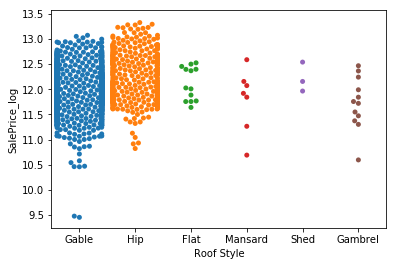

In [15]:
sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Roof Style']);

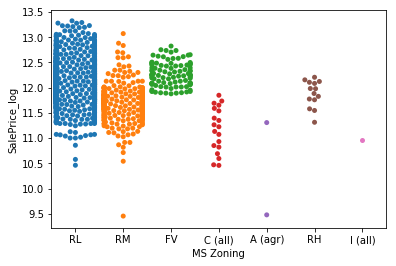

In [16]:
sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['MS Zoning']);

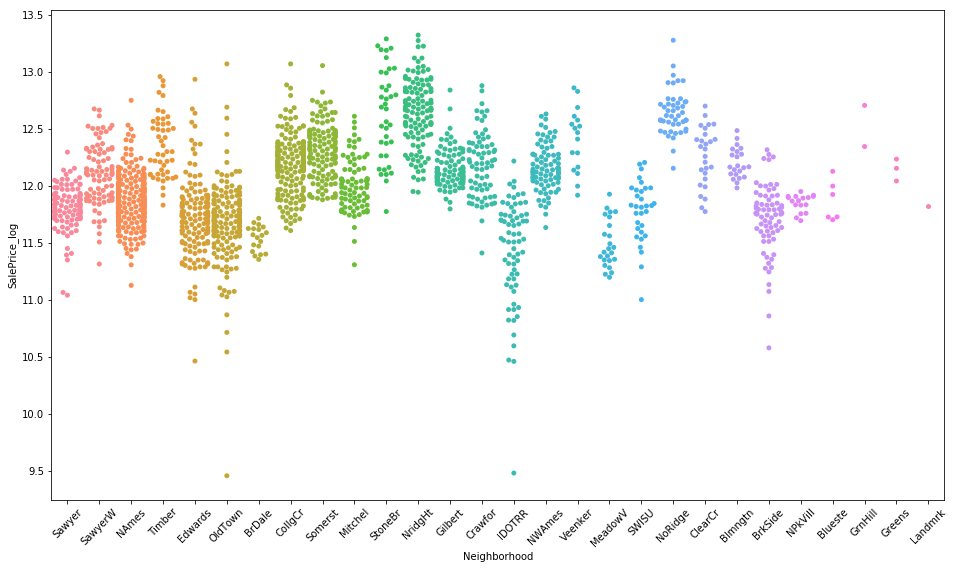

In [21]:
plt.figure(figsize=(16,9))
sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Neighborhood'])
plt.xticks(rotation=45);

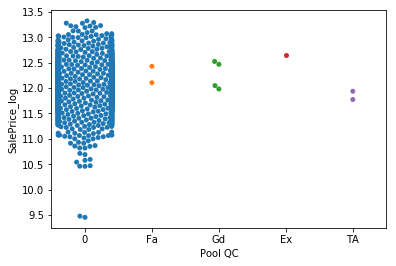

In [22]:
sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Pool QC']);

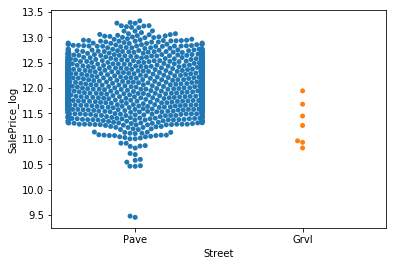

In [23]:
sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Street']);

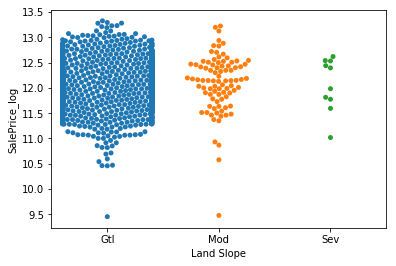

In [24]:
sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Land Slope'], order=['Gtl', 'Mod', 'Sev']);

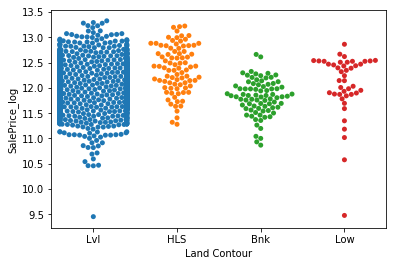

In [25]:
sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Land Contour']);

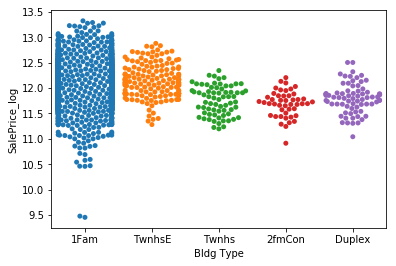

In [26]:
sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Bldg Type']);

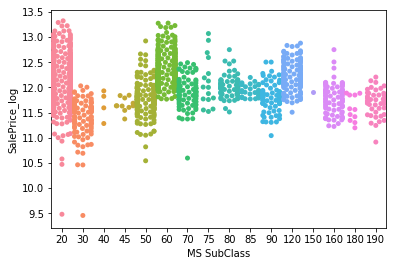

In [27]:
sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['MS SubClass']);

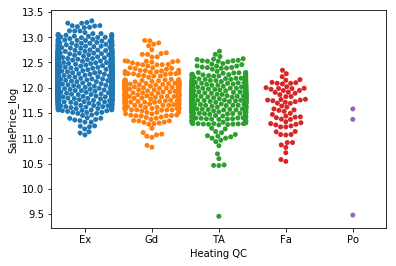

In [28]:
sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Heating QC'], order=['Ex', 'Gd', 'TA', 'Fa', 'Po']);

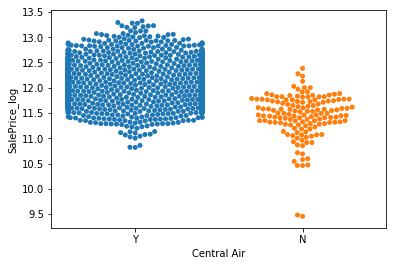

In [29]:
sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Central Air']);

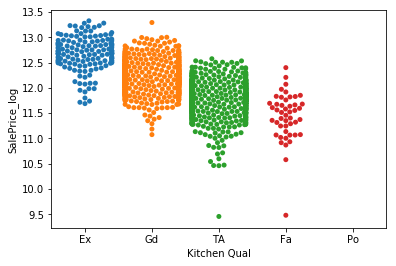

In [30]:
sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Kitchen Qual'], 
              order=['Ex', 'Gd', 'TA', 'Fa', 'Po']);

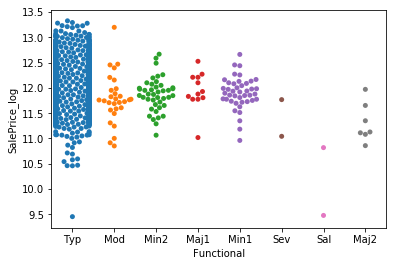

In [31]:
sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Functional']);

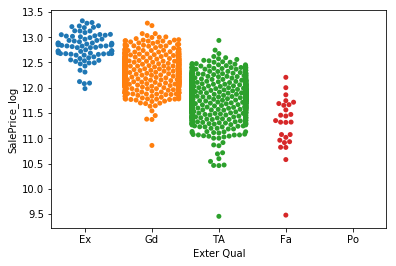

In [32]:
sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Exter Qual'], order=['Ex', 'Gd', 'TA', 'Fa', 'Po']);

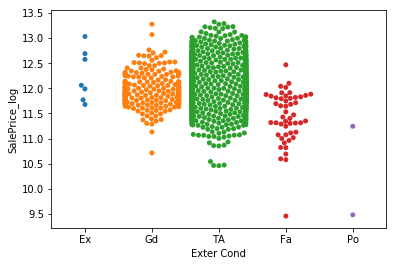

In [33]:
sns.swarmplot(y = with_dummies['SalePrice_log'], x = with_dummies['Exter Cond'], order=['Ex', 'Gd', 'TA', 'Fa', 'Po']);

Swarmplots showed how prices clustered around categorical features, as well as show clearly how many datapoints exist in each category. After review of the above plots, it looks like the following will be a good list of features to dummy:

- 'MS Zoning'
- 'Neighborhood'
- 'Land Contour'
- 'MS SubClass'
- 'Functional'

These features all have a good amount of entries (no null values), and the data shows clustering at different price points for different categories within each feature.

### Create Dummies

In [36]:
# Create dummies for the categorical columns I want to include in features that I think will 
# have an affect on SalePrice
with_dummies = pd.get_dummies(ames_df, columns=['MS Zoning', 
                                                'Neighborhood', 
                                                'Land Contour', 
                                                'MS SubClass',
                                                'Functional'
                                               ], drop_first=True)

### Check Correlations of Features to Sale Price

In [37]:
# Calculate the correlation of the different columns to SalePrice_log
with_dummies.corr()[['SalePrice_log']].sort_values('SalePrice_log', ascending = False)

,SalePrice_log
SalePrice_log,1.000000
SalePrice,0.946134
Overall Qual,0.822774
Gr Liv Area,0.687774
Garage Cars,0.667168
total_baths,0.659341
Garage Area,0.650243
Year Built,0.624449
Total Bsmt SF,0.622162
Year Remod/Add,0.599459


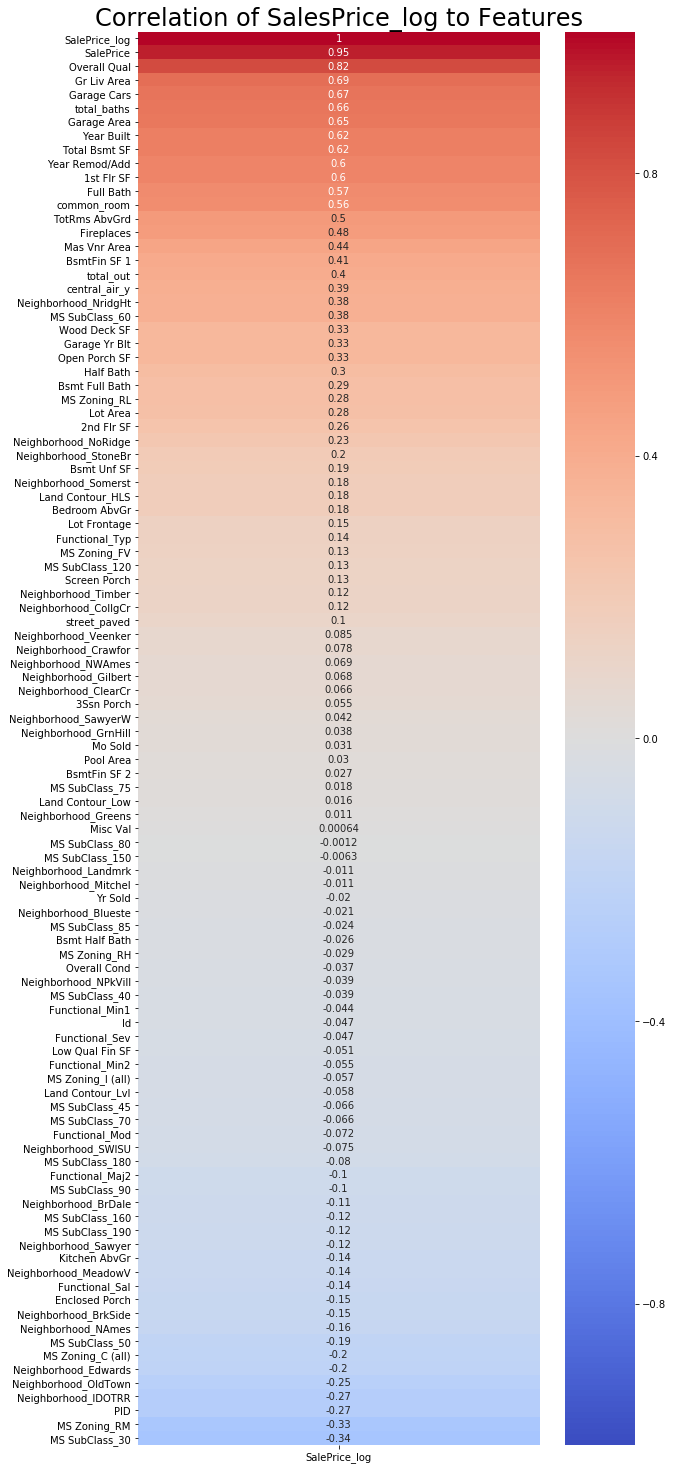

In [38]:
# Generate a heatmap of the correlation of the different columns to SalePrice_log
plt.figure(figsize = (9, 26))
sns.heatmap(with_dummies.corr()[['SalePrice_log']].sort_values('SalePrice_log', ascending=False), annot=True, 
            cmap='coolwarm', vmin=-1)
plt.title("Correlation of SalesPrice_log to Features", size = 24);

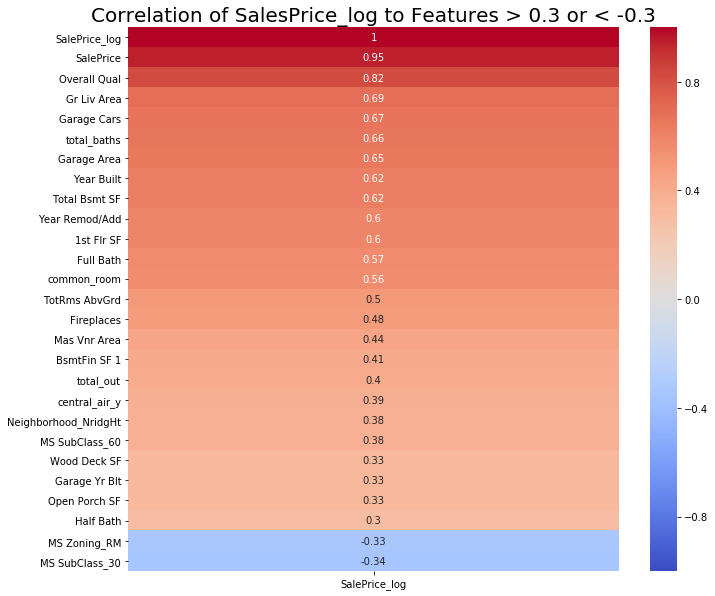

In [39]:
# Create a heatmap with a subset of columns that have greater than 0.3 or less than -0.3 correlation
# so that the heatmap isn't so crowded. Those limits are arbitrary, and serve to make
# the heatmap more visually appealing. It does help narrow down the list of features that
# are higher in correlation, and leaves out the features with low correlations.

corr_sub = with_dummies.corr()[['SalePrice_log']].sort_values('SalePrice_log', ascending = False)
plt.figure(figsize = (11, 10))
sns.heatmap(corr_sub[(corr_sub['SalePrice_log'] > .3) | (corr_sub['SalePrice_log'] < -.3)], annot=True, 
            cmap='coolwarm', vmin=-1)
plt.title("Correlation of SalesPrice_log to Features > 0.3 or < -0.3", size = 20);

The heatmap and list of correlations of features to 'SalePrice_log' showed that the following list of numeric features would be a good starting point to build the model since they all had a significant correlation number:

- 'Overall Qual'
- 'Gr Liv Area'
- 'Garage Cars'
- 'total_baths'
- 'Year Remod/Add'
- 'Total Bsmt SF'
- 'common_room' 
- 'Fireplaces'
- 'total_out'
- 'Lot Area'

<IPython.core.display.Javascript object>


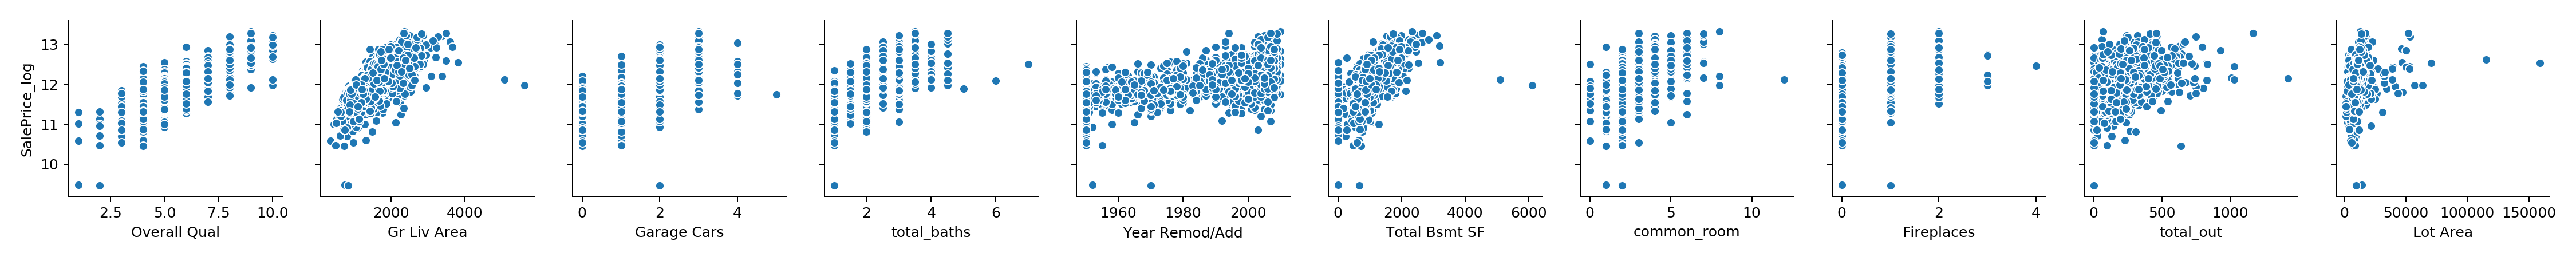

In [70]:
sns.pairplot(with_dummies, y_vars=['SalePrice_log'], x_vars=['Overall Qual', 
                                                             'Gr Liv Area', 
                                                             'Garage Cars', 
                                                             'total_baths', 
                                                             'Year Remod/Add', 
                                                             'Total Bsmt SF',
                                                             'common_room', 
                                                             'Fireplaces', 
                                                             'total_out', 
                                                             'Lot Area'],
            );

The pair plots of the numeric features showed a strong positive linear relationship with SalePrice_log, except for 'total_out' and 'Lot Area'. The relationship looks weaker for those two features.

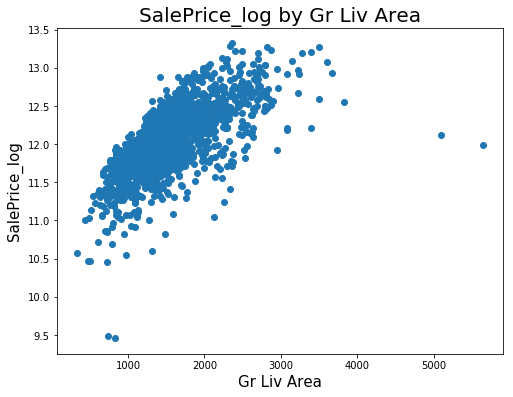

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(with_dummies['Gr Liv Area'], with_dummies['SalePrice_log'])
plt.title('SalePrice_log by Gr Liv Area', fontsize = 20)
plt.ylabel('SalePrice_log', fontsize = 15)
plt.xlabel('Gr Liv Area', fontsize = 15);

<IPython.core.display.Javascript object>


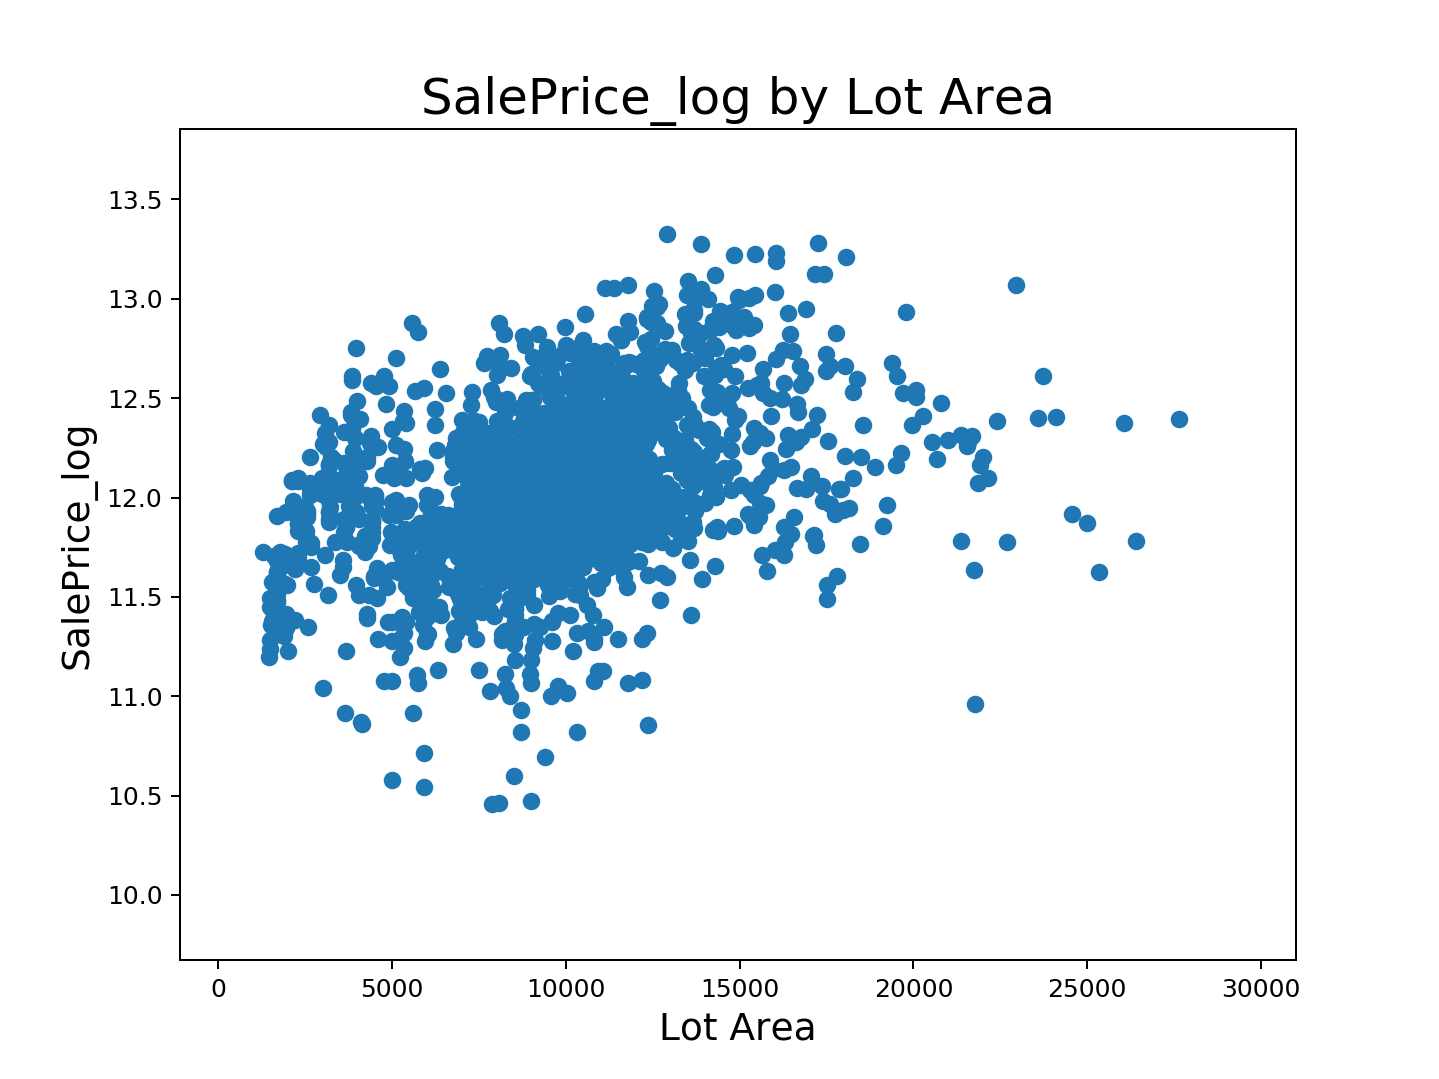

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(with_dummies['Lot Area'], with_dummies['SalePrice_log'])
plt.title('SalePrice_log by Lot Area', fontsize = 20)
plt.ylabel('SalePrice_log', fontsize = 15)
plt.xlabel('Lot Area', fontsize = 15);

After creating an individual scatter plot of the 'Lot Are' and 'SalePrice_log', I was able to zoom in and see the cluster of data under 30,000 square feet. The data here looks more linear compared with the pairplots.

### Feature Selection

The feature list includes all the numeric and categorical features I selected from the above exploratory data analysis. Additional features were subsequently added for multiple iterations to see how they would affect the model.

In [41]:
# Pick the features I think will generate a good model for predictions
features = [
            'Overall Qual', 
            'Gr Liv Area', 
            'Garage Cars', 
            'total_baths', 
            'Year Remod/Add', 
            'Total Bsmt SF',
            'common_room', 
            'total_out', 
            'Lot Area', 
            'Fireplaces',
            'Pool Area',
            'Bedroom AbvGr',
            'Kitchen AbvGr',
            'Misc Val',
            'Mas Vnr Area',
            'Garage Area',
            'Garage Yr Blt',
            'Lot Frontage',
            'MS Zoning_C (all)', 
            'MS Zoning_FV', 
            'MS Zoning_I (all)', 
            'MS Zoning_RH', 
            'MS Zoning_RL', 
            'MS Zoning_RM', 
            'street_paved',
            'central_air_y',
            'Neighborhood_Blueste', 
            'Neighborhood_BrDale', 
            'Neighborhood_BrkSide', 
            'Neighborhood_ClearCr', 
            'Neighborhood_CollgCr',
            'Neighborhood_Crawfor', 
            'Neighborhood_Edwards', 
            'Neighborhood_Gilbert', 
            'Neighborhood_Greens',
            'Neighborhood_GrnHill', 
            'Neighborhood_IDOTRR', 
            'Neighborhood_Landmrk', 
            'Neighborhood_MeadowV',
            'Neighborhood_Mitchel', 
            'Neighborhood_NAmes', 
            'Neighborhood_NPkVill', 
            'Neighborhood_NWAmes',
            'Neighborhood_NoRidge', 
            'Neighborhood_NridgHt', 
            'Neighborhood_OldTown', 
            'Neighborhood_SWISU',
            'Neighborhood_Sawyer', 
            'Neighborhood_SawyerW', 
            'Neighborhood_Somerst', 
            'Neighborhood_StoneBr',
            'Neighborhood_Timber', 
            'Neighborhood_Veenker',
            'Land Contour_HLS',
            'Land Contour_Low',
            'Land Contour_Lvl',
            'MS SubClass_30',
            'MS SubClass_40',
            'MS SubClass_45',
            'MS SubClass_50',
            'MS SubClass_60',
            'MS SubClass_70',
            'MS SubClass_75',
            'MS SubClass_80',
            'MS SubClass_85',
            'MS SubClass_90',
            'MS SubClass_120',
            'MS SubClass_150',
            'MS SubClass_160',
            'MS SubClass_180',
            'MS SubClass_190',
            'Functional_Maj2',
            'Functional_Min1',
            'Functional_Min2',
            'Functional_Mod',
            'Functional_Sal',
            'Functional_Sev',
            'Functional_Typ',
            ]

### Create Model

In [42]:
# Create X and y
X = with_dummies[features]
y = with_dummies['SalePrice_log']

# Train/test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=54)

# Scale the data
ss = StandardScaler()
ss.fit(X_train) 
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test) 

In [43]:
# Instantiate 3 models
lr = LinearRegression()
lasso = LassoCV(cv=5, max_iter=5000)
ridge = RidgeCV()

In [44]:
# Check the score of the three models
print(f'Linear Regression: {cross_val_score(lr, X_train_sc, y_train, cv=5).mean()}')
print(f'Lasso: {cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()}')
print(f'Ridge: {cross_val_score(ridge, X_train_sc, y_train, cv=5).mean()}')

Linear Regression: -4.6439128991205095e+21
Lasso: 0.8566256954889712
Ridge: 0.8557676148649541


In [45]:
# lasso appears to be the best model. Fit the lasso model
lasso.fit(X_train_sc, y_train)

# Score the model
lasso.score(X_train_sc, y_train)

0.8903039967273043

In [46]:
# Score the model with test data
lasso.score(X_test_sc, y_test)

0.8863710394181485

In [47]:
# Since the train and test scores are fairly close, bias and variance appear to be at the optimal range

In [48]:
cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()

0.8566256954889712

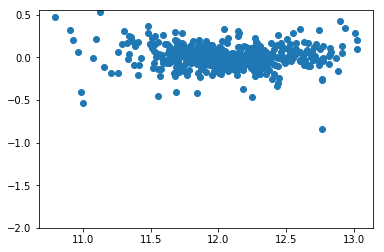

In [49]:
# Plot the predictions against the residuals to check for heteroscedasticity 
pred = lasso.predict(X_test_sc)
residuals = y_test - pred
plt.scatter(pred, residuals, vmin=-2.0, vmax=.5)
plt.ylim(-2, .55);

In [51]:
# Calculate the root mean squared
rss = (residuals ** 2).sum()
np.sqrt(rss/ len(pred))

0.13404822929843546

The features were scaled before running them through all three models (Linear Regression, Lasso, and Ridge). I also calculated the scores for each model so that I may pick the best fit. The Linear Regression model never worked for me, so it's an item I'll have to investigate. 90% of the time I used a Lasso model as opposed to Ridge as it generated the best score. I tried submitting a Lasso model and Ridge model with the same feature set into Kaggle, and there was a negligible score variance between the two. For the most part I saw model and cross-val scores around 0.84 all the way up to 0.90 through all the different model iterations.  

The scatter plots of predictions and residuals look evenly distributed, with a few outliers. Doesn't appear to be a pattern, so homoscedastic. The residuals distribution tighten up around 0 from earlier models to the final model.

The root mean squared dropped from around 0.15 to 0.13 from earlier models to the final model.

In [52]:
# Fit the model on the entire dataset
# Scale the data
ss = StandardScaler()
ss.fit(X) 
X_sc = ss.transform(X)

# Fit the model
lasso.fit(X_sc, y)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=5000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

Fitting the model on the entire train dataset helped create better predictions for the test data.

### Process the Test Data for Predictions

In [53]:
# Read in the Ames test data into a dataframe
ames_test = pd.read_csv('../datasets/test.csv')

In [54]:
# Check the first few rows of data
ames_test.head().T

,0,1,2,3,4
Id,2658,2718,2414,1989,625
PID,902301120,905108090,528218130,902207150,535105100
MS SubClass,190,90,60,30,20
MS Zoning,RM,RL,RL,RM,RL
Lot Frontage,69,NaN,58,60,NaN
Lot Area,9142,9662,17104,8520,9500
Street,Pave,Pave,Pave,Pave,Pave
Alley,Grvl,NaN,NaN,NaN,NaN
Lot Shape,Reg,IR1,IR1,Reg,IR1
Land Contour,Lvl,Lvl,Lvl,Lvl,Lvl


In [55]:
# Fill the null cells with 0 as a placeholder
[ames_test[c].fillna(0, inplace=True) for c in ames_test]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [56]:
# Create dummies for the categorical columns I want to include in features that I think will 
# have an affect on SalePrice
test_with_dummies = pd.get_dummies(ames_test, columns=['MS Zoning', 
                                                       'Neighborhood', 
                                                       'Land Contour', 
                                                       'MS SubClass', 
                                                       'Functional'
                                                      ], drop_first=True)

In [57]:
# Create a new column for the total number of baths in the listing
test_with_dummies['total_baths'] = test_with_dummies['Bsmt Full Bath'] + \
                                   test_with_dummies['Bsmt Half Bath']/2 +\
                                   test_with_dummies['Full Bath'] + \
                                   test_with_dummies['Half Bath']/2

In [58]:
# Create a new column for the total square feet of outdoor living space
test_with_dummies['total_out'] = test_with_dummies['Wood Deck SF'] + \
                                 test_with_dummies['Open Porch SF'] + \
                                 test_with_dummies['Enclosed Porch'] + \
                                 test_with_dummies['3Ssn Porch'] + \
                                 test_with_dummies['Screen Porch']

In [59]:
# Create a new column for common rooms
test_with_dummies['common_room'] = test_with_dummies['TotRms AbvGrd'] - \
                             (test_with_dummies['Kitchen AbvGr'] + test_with_dummies['Bedroom AbvGr'])

In [60]:
# Create a new column for 'street'
test_with_dummies['street_paved'] = test_with_dummies['Street'].replace(to_replace=('Pave', 'Grvl'), value=(1, 0))

In [61]:
# Create a new column for 'central_air_y'
test_with_dummies['central_air_y'] = test_with_dummies['Central Air'].replace(to_replace=('Y', 'N'), value=(1, 0))

In [62]:
# Add placeholder columns for features not found in Ames_test dataset
test_with_dummies['Neighborhood_GrnHill'] = 0
test_with_dummies['Neighborhood_Landmrk'] = 0
test_with_dummies['MS Zoning_C (all)'] = 0
test_with_dummies['MS SubClass_150'] = 0
test_with_dummies['Functional_Sal'] = 0
test_with_dummies['Functional_Sev'] = 0

In [63]:
# Create X for Ames_test
test_X = test_with_dummies[features]

# Scale the data
ss.fit(test_X) 
test_X_sc = ss.transform(test_X)

In [64]:
# Run the lasso model on the Ames_test data
test_with_dummies['SalePrice_log'] = lasso.predict(test_X_sc)

In [65]:
# Convert the 'SalesPrice_log' back to 'SalesPrice' by using .exp
test_with_dummies['SalePrice'] = np.exp(test_with_dummies['SalePrice_log'])

In [66]:
# Create new dataframe for the submission file
sub_df = pd.DataFrame(columns=['Id', 'SalePrice'])
sub_df['Id'] = test_with_dummies['Id']
sub_df['SalePrice'] = test_with_dummies['SalePrice']
sub_df

,Id,SalePrice
0,2658,116905.584553
1,2718,162453.098923
2,2414,203995.342214
3,1989,110918.154652
4,625,181222.377100
5,333,87947.099408
6,1327,107856.265915
7,858,142162.136411
8,95,179238.907461
9,1568,180834.664121


In [67]:
# Save the submission dataframe to a .csv file
sub_df.to_csv('../datasets/submission17_lasso.csv', index=False)

## Results
Generated a score of 23386.24490 in the Kaggle competition, which is better than my 14th attempt. Started with same features as attempt 14. Added 'Exter Qual' and 'Condition 1' and 'Condition 2' as dummies.

# Conclusions
There are a lot of features that go into determining the price!
Steps to select the best set of features:
- Evaluate how much data is within each feature
- Use boxplots or swarmplots to see how price clusters around categorical features
- Refer to correlation to narrow down the list of numeric features
- Don’t include features that overlap
- Think like a buyer!

Features that increase house values:
- Overall quality and fit
- Total house square footage
- Number of bathrooms, bedrooms, common rooms
- Garage size/number of cars it can fit
- Fireplaces
- Central air conditioning

Features to avoid:
- Houses older than 1945
- Residential zones of medium density
- Enclosed porches

3 Neighborhoods that have higher house values:
- Northridge Heights
- Northridge
- Stone Brook

3 Neighborhoods that have lower house values:
- Iowa DOT and Rail Road
- Old Town
- Edwards

## Next Steps

- Add model to predict values for features with lots of null values or zeros where there shouldn't be  
- Try converting ordinal features to a numeric scale
- Drop outliers mentioned in the Data Dictionary from Kaggle
- Use p-value to evaluate features

Outside References:
- https://en.wikipedia.org/wiki/Ames,_Iowa
- https://money.cnn.com/magazines/moneymag/bplive/2010/snapshots/PL1901855.html